# Gráficos -

#### Erro x j12 - distribuição do erro em relação ao j12 predito.


In [1]:
import DPQNova

In [2]:
dpq = DPQNova.DinamicaPontosQuanticos(j_1_inicial= 10, j_1_final= 10, passoJ_1 = 0.5,
                                      j_2_inicial= 10, j_2_final= 10, passoJ_2 = 0.5,
                                      bz_1_inicial= 0.1, bz_1_final= 10, passoBz_1 = 2,
                                      bz_2_inicial= 0.1, bz_2_final= 10, passoBz_2 = 2,
                                      j_12_inicial= 0.02, j_12_final= 10, passoJ_12 = 0.2,
                                      tInicial=1, tFinal=20, passoT=1)
print("tamanho:",len(dpq.elementos_iter))

tamanho: 1836


In [65]:
dpq.criaDataFrame()
model, X_train, X_test, y_train, y_test = dpq.set_model()
y_train_pred = model.predict(X_train)

/home/codemaster/Desktop/backup/Dinamica Pontos Quanticos/DPQNova.py:277: ComplexWarning: Casting complex values to real discards the imaginary part
  ox1 = np.float32(self.Ox1(rovalor))
/home/codemaster/Desktop/backup/Dinamica Pontos Quanticos/DPQNova.py:278: ComplexWarning: Casting complex values to real discards the imaginary part
  ox2 = np.float32(self.Ox2(rovalor))
/home/codemaster/Desktop/backup/Dinamica Pontos Quanticos/DPQNova.py:279: ComplexWarning: Casting complex values to real discards the imaginary part
  oy1 = np.float32(self.Oy1(rovalor))
/home/codemaster/Desktop/backup/Dinamica Pontos Quanticos/DPQNova.py:280: ComplexWarning: Casting complex values to real discards the imaginary part
  oy2 = np.float32(self.Oy2(rovalor))
/home/codemaster/Desktop/backup/Dinamica Pontos Quanticos/DPQNova.py:281: ComplexWarning: Casting complex values to real discards the imaginary part
  oz1 = np.float32(self.Oz1(rovalor))
/home/codemaster/Desktop/backup/Dinamica Pontos Quanticos/DPQNova

In [ ]:
help(model)

In [5]:
model.feature_importances_

array([0.02690989, 0.03024414, 0.0839896 , 0.09217313, 0.06524972,
       0.06188844, 0.02245571, 0.01976255, 0.03644459, 0.04337588,
       0.01594168, 0.01607123, 0.0095555 , 0.00995034, 0.0111979 ,
       0.01114754, 0.00827585, 0.01011148, 0.01295943, 0.01329663,
       0.00637548, 0.00693966, 0.00521613, 0.00537084, 0.00529002,
       0.00616005, 0.00597855, 0.00559519, 0.00519829, 0.00403077,
       0.00769298, 0.00559578, 0.0028609 , 0.00246947, 0.01091447,
       0.01176535, 0.00421382, 0.0029788 , 0.00241096, 0.0026674 ,
       0.00334581, 0.00227847, 0.00300856, 0.00345589, 0.00296536,
       0.00380219, 0.00339526, 0.00249916, 0.00795415, 0.00889658,
       0.0039691 , 0.00249607, 0.00733294, 0.0062254 , 0.00675905,
       0.00664499, 0.00153279, 0.00182119, 0.02248265, 0.01697025,
       0.0054152 , 0.00701721, 0.00184721, 0.00171949, 0.00451768,
       0.00305974, 0.00271085, 0.00350651, 0.00213455, 0.00146514,
       0.00412282, 0.00235449, 0.00479174, 0.00291606, 0.00181

In [6]:
model.n_features_in_

120

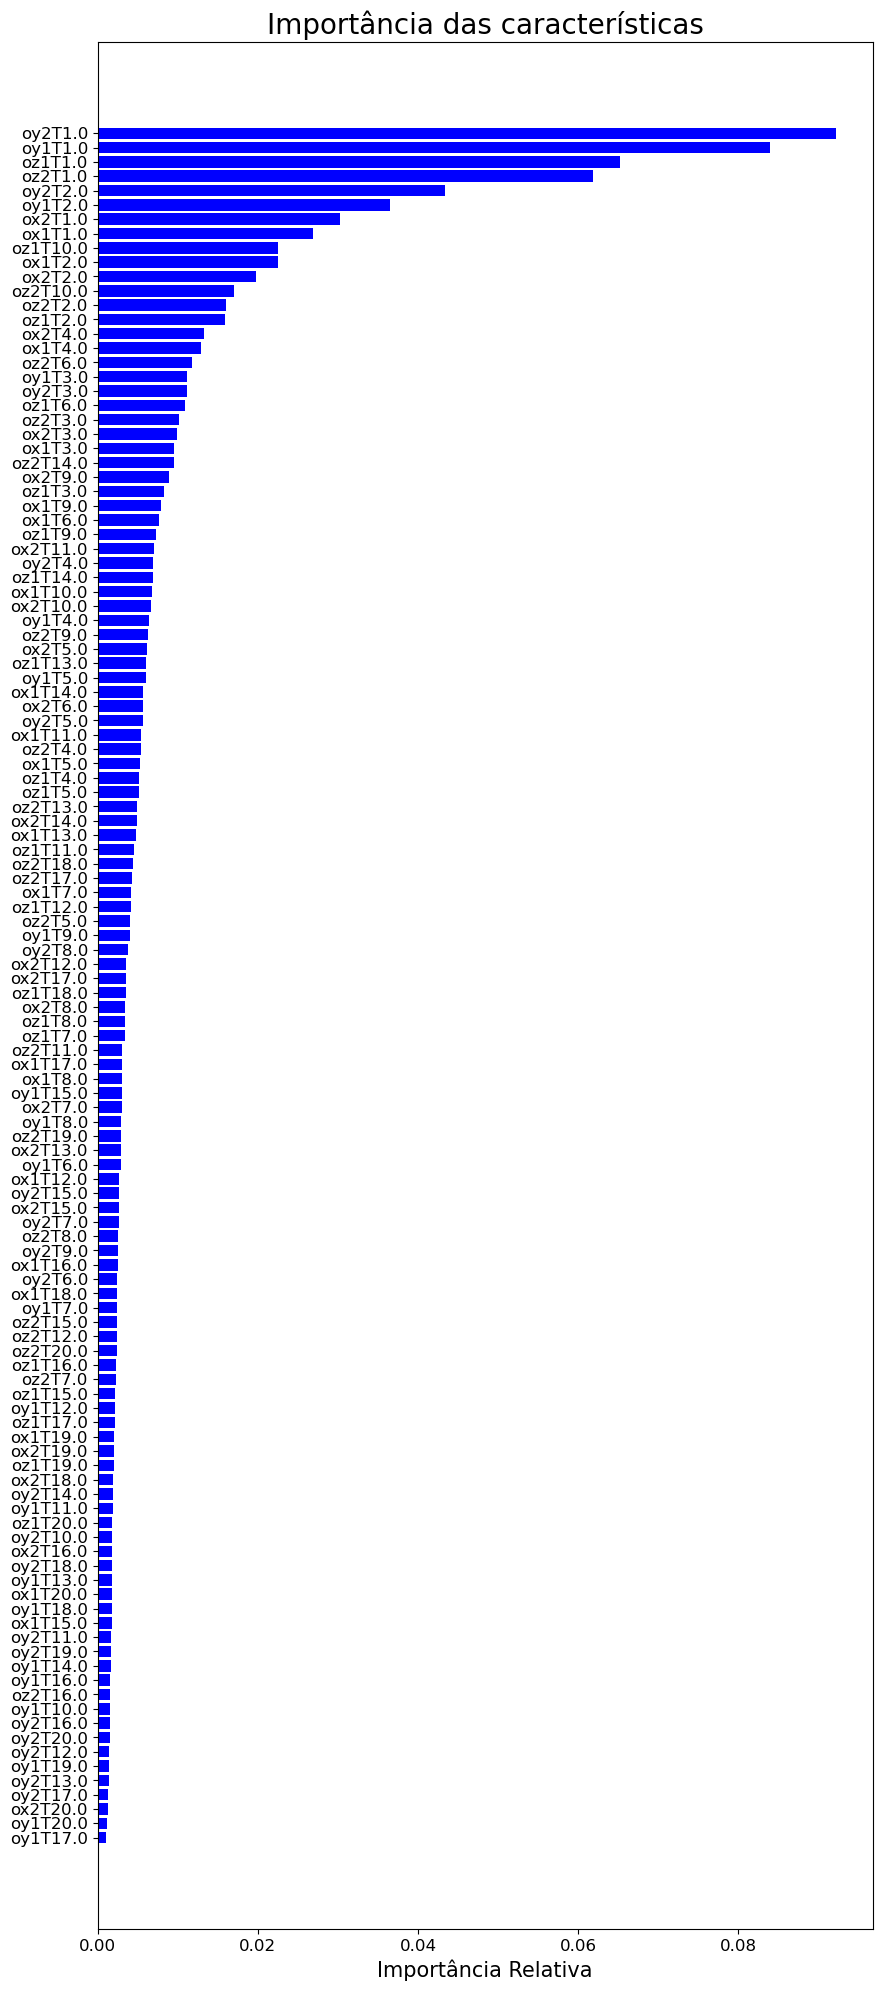

In [257]:
import numpy as np
import matplotlib.pyplot as plt
features = X_train.columns
importances = model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10, 25), dpi=100)
plt.title("Importância das características", fontsize=20)
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importância Relativa',fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

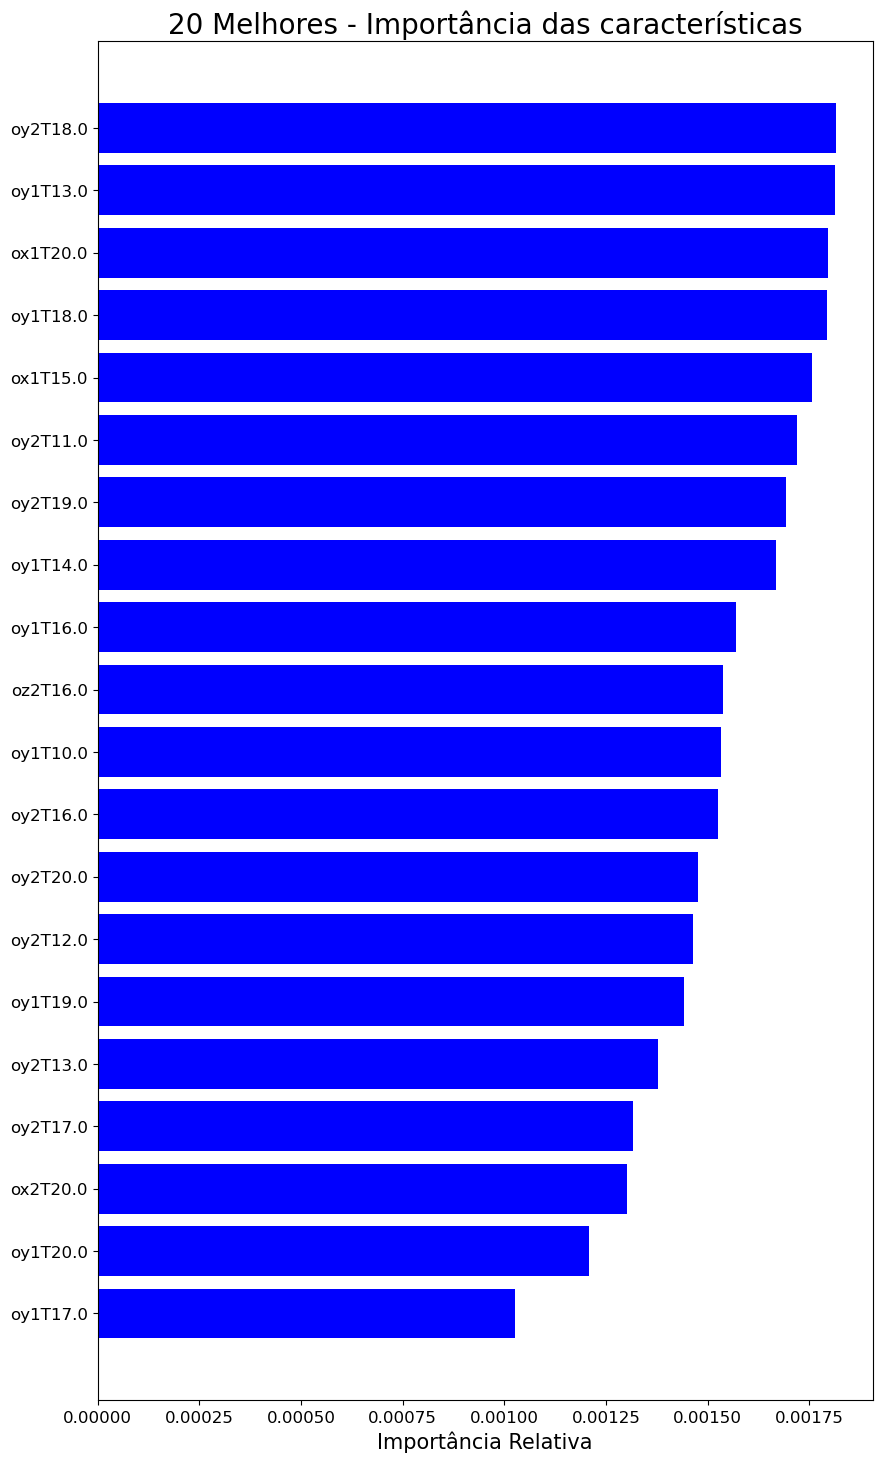

In [250]:
import numpy as np
import matplotlib.pyplot as plt
features = X_train.columns
importances = model.feature_importances_
indices = np.argsort(importances)[:20]
plt.figure(figsize=(10, 18), dpi=100)
plt.title("20 Melhores - Importância das características", fontsize=20)
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importância Relativa',fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

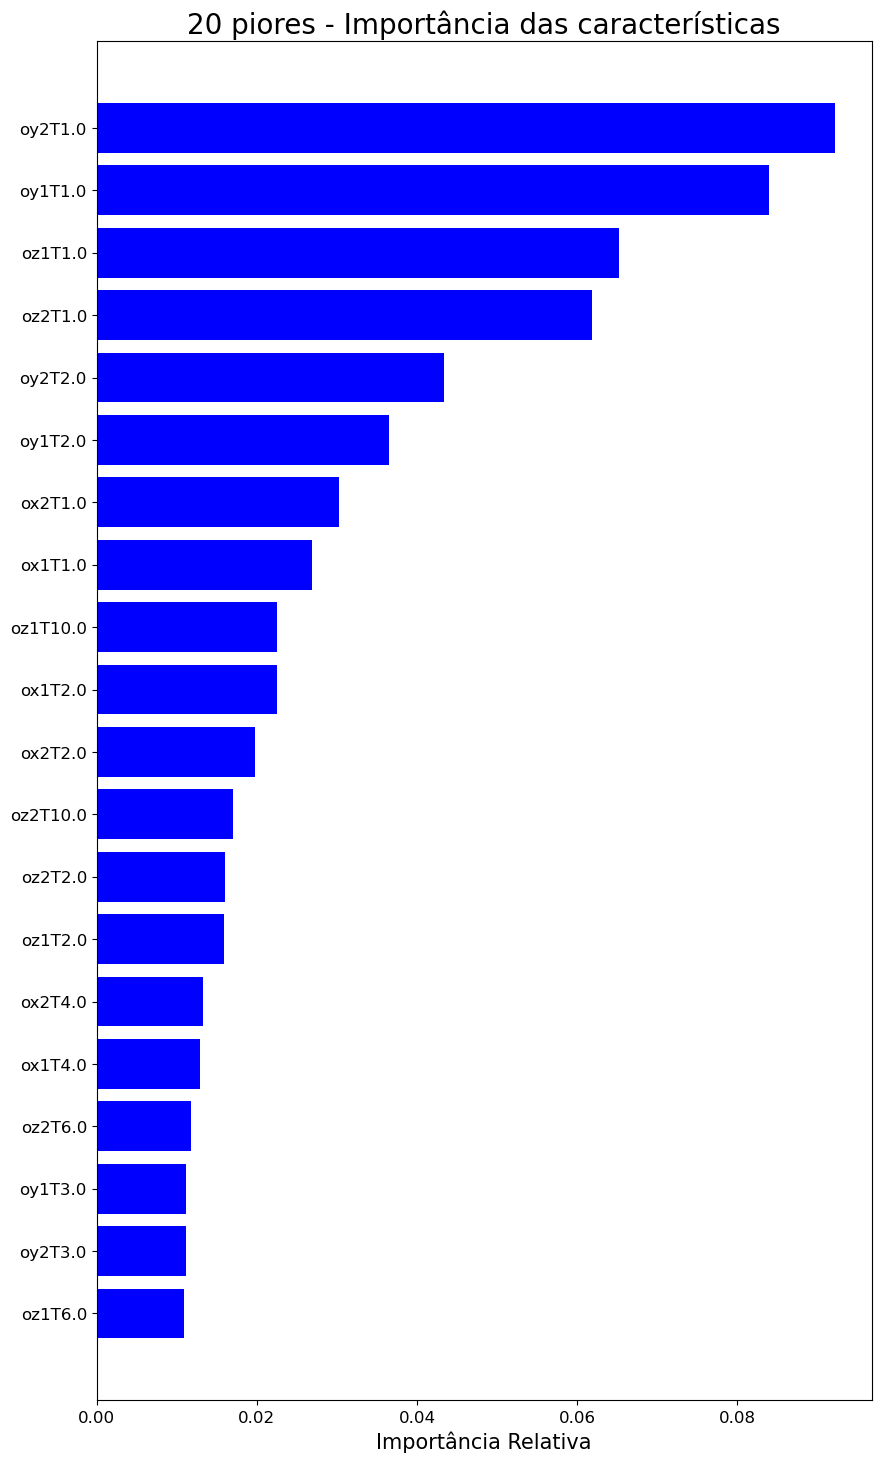

In [254]:
features = X_train.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-20:]
plt.figure(figsize=(10, 18), dpi=100)
plt.title("20 piores - Importância das características", fontsize=20)
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importância Relativa',fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

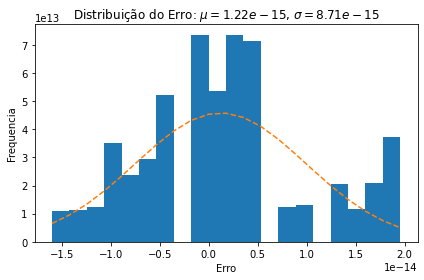

In [66]:
def error_dist(y_real, y_pred, num_bins = 20):
    #Erro ao quadrado
    error_sqr = (y_pred-y_real)
    #Mean of distribution
    mu = error_sqr.mean()
    #Standard deviation
    sigma = error_sqr.std()

    
    fig, ax = plt.subplots()
    
    #O histograma dos dados
    n, bins, patches = ax.hist(error_sqr,num_bins, density=True)
    
    #Add a 'Best fit' line
    y= ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
    ax.plot(bins, y, '--')
    ax.set_xlabel('Erro')
    ax.set_ylabel('Frequencia')
    ax.set_title(r'Distribuição do Erro: $\mu={:.2e}$, $\sigma={:.2e}$'.format(mu, sigma))
    
    #Tweak spacing to prevent clipping of ylabel
    fig.tight_layout()
    plt.show()
    return
error_dist(y_train, y_train_pred,20)

Error_sum:
 [1.1731108921454868e-27, 1.3052693604873055e-27, 1.6536126947146138e-27, 1.6487077363322483e-27, 9.347017576667408e-28, 2.189157575094328e-27, 1.6369973118983962e-27, 1.9377538060948124e-27, 3.794451768992177e-28, 2.753038470152817e-27, 2.150059849072306e-27, 2.675323152443909e-27, 9.424124107920895e-28, 1.2518236489725931e-27, 1.7871649585571856e-27, 1.629244288314271e-27, 1.579456880728922e-27, 1.6345423289982858e-27, 1.2773060132527695e-27, 1.997740938665636e-27, 1.0448194985390032e-27, 2.6050652280726625e-27, 1.7103490501323062e-27, 2.7421298103548133e-27, 1.717547405892448e-27, 1.992866024790403e-27, 2.225547251021547e-27, 2.3586673361845983e-27, 1.9708765270573674e-27, 1.9992726307504073e-27, 1.5001615300936386e-27, 3.378543538234859e-27, 1.685864510156317e-27, 1.4433227152029047e-27, 1.8541998391665e-27, 3.471431717231639e-27, 1.913404466400919e-27, 1.3865216485390809e-27, 2.321186235757895e-27, 1.955260316696298e-27, 2.840108799973592e-27, 1.3082518555991836e-27, 2.

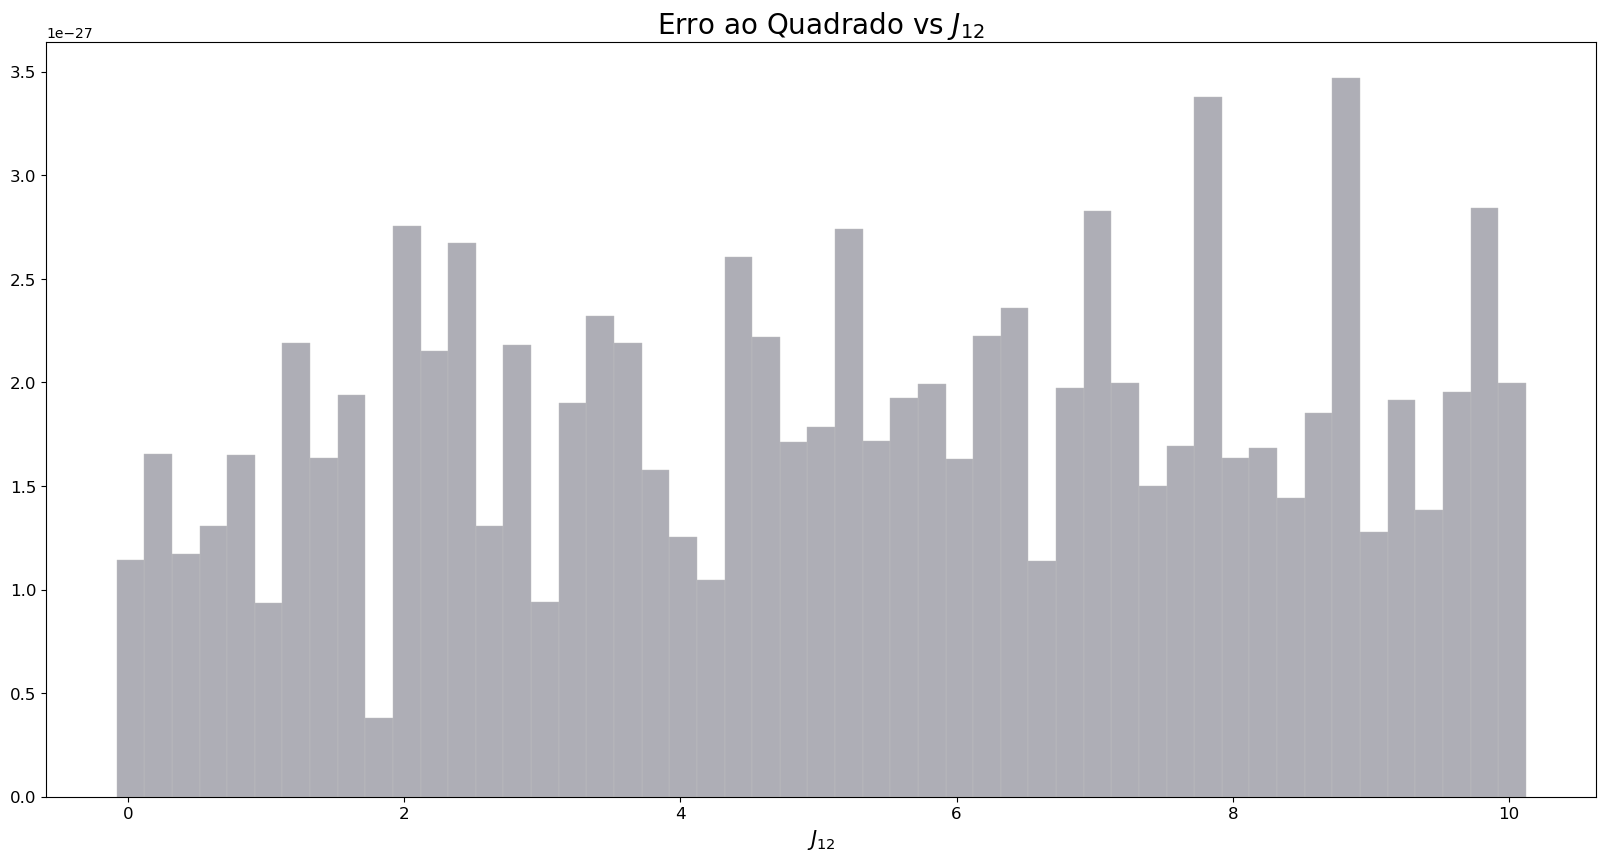

In [242]:
import matplotlib as mpl

def error_Vs_j12(y_real, y_pred, intervalo=0.2):
    

    y_real = np.array(y_real)
    y_pred = np.array(y_pred)
    
    #Captura indices ordenados
    indices_ord = y_real.argsort()
    #Calculando o erro ao quadrado
    erro_sqr = (y_real[indices_ord] - y_pred[indices_ord])**2
    
    #Inicializando variáveis para o while
    error_sum = []
    error_y = list(set(y_real[indices_ord]))
    err = 0
    i_ant = indices_ord[0]
    for i in indices_ord: 
        if y_real[i_ant] == y_real[i]:
            err += erro_sqr[i] 
        else:
            error_sum.extend([err])
            err = 0
        i_ant = i
    error_sum.extend([err])
    
    #Plot
    #fig, ax = plt.subplots()
    #ax.bar(error_y, error_sum, edgecolor="white", linewidth=0.1)
    #ax.set(xlim=(y_real.min(), y_real.max()), xticks=error_y,ylim=(np.array(error_sum).max(), np.array(error_sum).min()), yticks=np.arange(0,2))
    #fig.set(figsize=(10,20))
    #plt.show()
    
    #Plot2
    plt.figure(figsize=(20, 10), dpi=100)
    plt.title(r'Erro ao Quadrado vs $J_{12}$', fontsize=20)
    plt.bar(error_y, error_sum, edgecolor="silver", linewidth=0.3, color='#AEAEB6', align='center',width=0.2)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.xlabel(r'$J_{12}$',fontsize=15)
    plt.show()    
    return

error_Vs_j12(y_train, y_train_pred)


In [93]:
np.array(y_train)[ind]

array([ 0.02,  0.02,  0.02, ..., 10.02, 10.02, 10.02])

In [ ]:
error = (y2-y)**2

In [ ]:
error.std()